# LGBM & XGBM

## Objective :
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.


### Task-1 Exploratory Data Analysis (EDA) :
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.


##### Import the Required Libraries.

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [161]:
train_data=pd.read_csv('Titanic_train.csv')
test_data=pd.read_csv('Titanic_test.csv')

In [162]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [165]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


#### Handling Missing Values.

In [185]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [187]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [189]:
# Fill missing values in train_data Age with Median and Embarked with Mode.
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

In [191]:
# Fill missing values in test_data Age with Median and Fare with Median.
test_data['Age'].fillna(test_data['Age'].median(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)

In [193]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [195]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [197]:
# Dropping 'Cabin' Column from train and test dataset.
train_data=train_data.drop(columns=['Cabin'])
test_data=test_data.drop(columns=['Cabin'])

#### Visualization of Numerical Features.

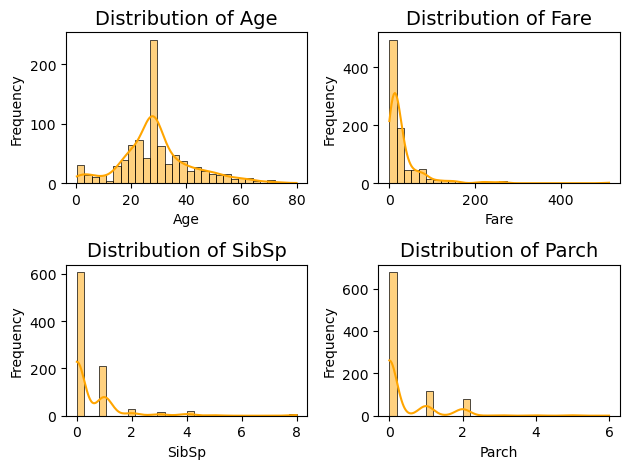

In [200]:
num_cols=['Age','Fare','SibSp','Parch']
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.histplot(train_data[col],kde=True,bins=30,color='orange')
    plt.title(f'Distribution of {col}',fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Visualization of Categorical Features.

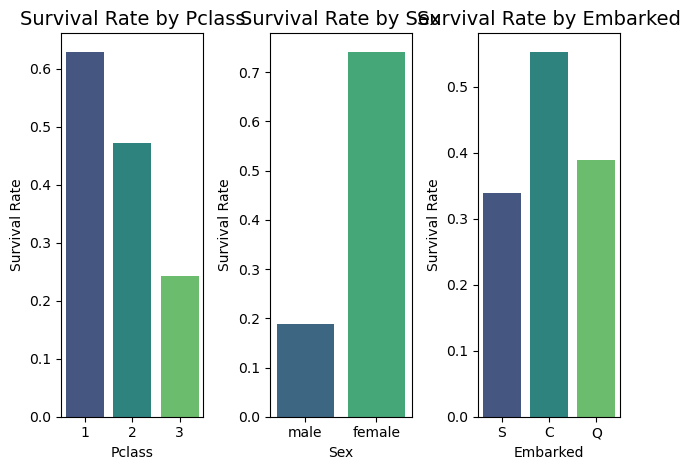

In [203]:
cat_cols=['Pclass','Sex','Embarked']
for i,col in enumerate(cat_cols,1):
    plt.subplot(1,3,i)
    sns.barplot(x=col,y='Survived',data=train_data,ci=None,palette='viridis')
    plt.title(f'Survival Rate by {col}',fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

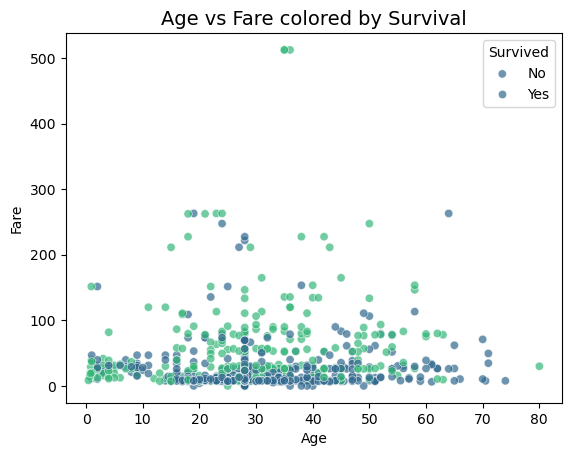

In [205]:
# Scatter plot for Age vs. Fare colored by survival
sns.scatterplot(data=train_data,x='Age',y='Fare',hue='Survived',palette='viridis',alpha=0.7)
plt.title('Age vs Fare colored by Survival',fontsize=14)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

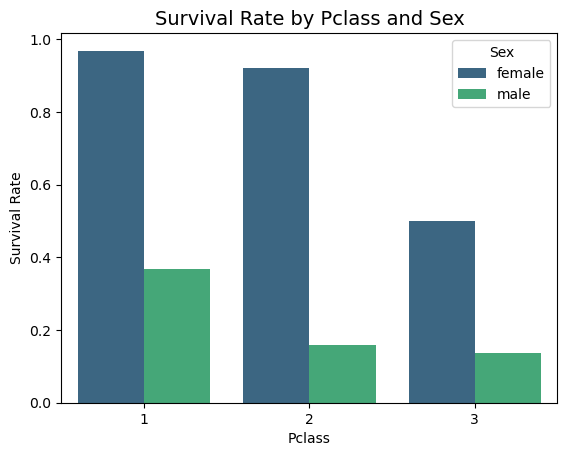

In [207]:
# Bar Plot for Survival rate.
sns.barplot(data=train_data,x='Pclass',y='Survived',hue='Sex',ci=None,palette='viridis')
plt.title('Survival Rate by Pclass and Sex',fontsize=14)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.show()

### Task-2 Data Preprocessing :
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given datase.


##### Encoding Categorical Columns.

In [210]:
train_data=pd.get_dummies(train_data,columns=['Sex','Embarked'],drop_first=True)
test_data=pd.get_dummies(test_data,columns=['Sex','Embarked'],drop_first=True)

In [222]:
train_columns=set(train_data.columns)
test_columns=set(test_data.columns)

In [226]:
for col in train_columns-test_columns:
    test_data[col] = 0

In [230]:
test_data=test_data[train_data.columns.difference(['Survived'])]

In [234]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


### Task-3 Building Predictive Models :
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


In [239]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import lightgbm as lgb
import xgboost as xgb

In [241]:
# Split the training data.
X=train_data.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y=train_data['Survived']
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

##### LightGBM model :
LightGBM is an ensemble learning framework, specifically a gradient boosting method, which constructs a strong learner by sequentially adding weak learners in a gradient descent manner.It optimizes memory usage and training time with techniques like Gradient-based One-Side Sampling (GOSS).


In [245]:
lgb_train=lgb.Dataset(X_train,label=y_train)
lgb_model=lgb.train({'objective':'binary','metric':'binary_error'},lgb_train,num_boost_round=100)
lgb_preds=(lgb_model.predict(X_val)>0.5).astype(int)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


##### XGBoost model :
XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction.

In [248]:
xgb_model= xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')
xgb_model.fit(X_train,y_train)
xgb_preds=xgb_model.predict(X_val)

#### Evaluation Metrics.

In [251]:
# Evaluation Metrics Dictionary.
metric={
    'Accuracy':accuracy_score,
    'Precision':precision_score,
    'Recall':recall_score,
    'F1-Score':f1_score
}

In [253]:
# Computing the Evaluation Metrics for Both Models.
metrics={metric:[func(y_val,lgb_preds),func(y_val,xgb_preds)] for metric,func in metric.items()}

In [255]:
Evaluation_metrics=pd.DataFrame(metrics,index=['LightGBM','XGBoost'])
Evaluation_metrics

,Accuracy,Precision,Recall,F1-Score
LightGBM,0.798883,0.753846,0.710145,0.731343
XGBoost,0.826816,0.779412,0.768116,0.773723


### Task-4 Comparative Analysis :
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [258]:
Evaluation_metrics

,Accuracy,Precision,Recall,F1-Score
LightGBM,0.798883,0.753846,0.710145,0.731343
XGBoost,0.826816,0.779412,0.768116,0.773723


In [264]:
metrics_cols=Evaluation_metrics.columns
lightgbm_scores=Evaluation_metrics.loc['LightGBM']
xgboost_scores=Evaluation_metrics.loc['XGBoost']
x=np.arange(len(metrics_cols))
width=0.35

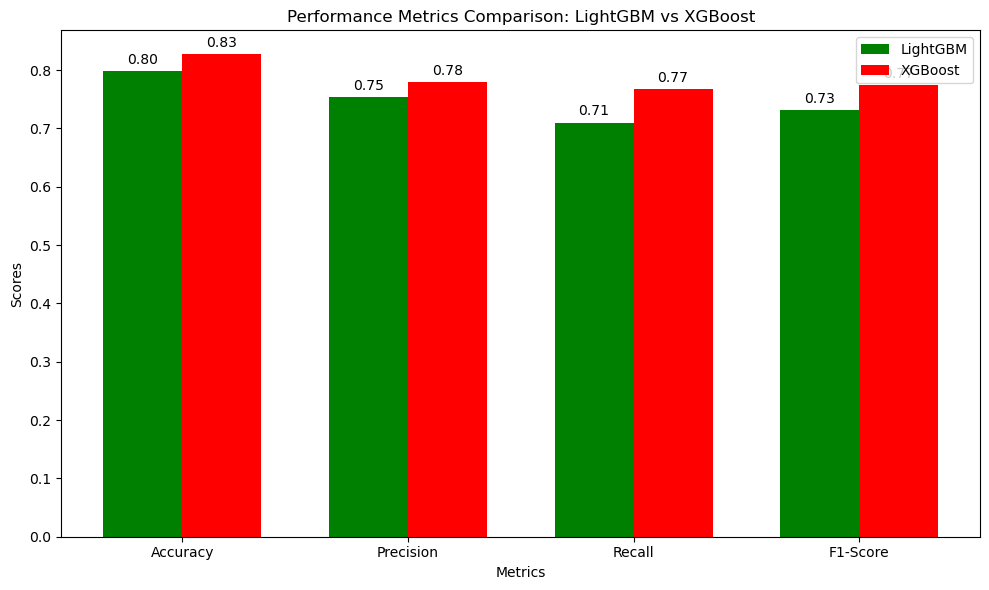

In [287]:
fig,ax=plt.subplots(figsize=(10,6))
LGBM=ax.bar(x-width/2,lightgbm_scores,width,label='LightGBM',color='green')
XGBM=ax.bar(x+width/2,xgboost_scores,width,label='XGBoost',color='red')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison: LightGBM vs XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for bars in [LGBM,XGBM]:
    for bar in bars:
        height=bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x()+bar.get_width()/2,height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center',va='bottom')

plt.tight_layout()
plt.show()

In [289]:
Evaluation_metrics

,Accuracy,Precision,Recall,F1-Score
LightGBM,0.798883,0.753846,0.710145,0.731343
XGBoost,0.826816,0.779412,0.768116,0.773723


##### Comparative Analysis Report :
The comparison of LightGBM and XGBoost models revealed notable differences in their performance on the Titanic dataset. While both algorithms showed strong predictive abilities, their strengths varied depending on the evaluation metric.

1. LightGBM achieved higher precision and recall, indicating its effectiveness in
correctly identifying true positives while minimizing false negatives. In contrast,
2. XGBoost delivered better accuracy and F1-score, showcasing its consistency in overall predictions.
3. LightGBM is more suitable for scenarios where reducing false negatives is critical, such as in healthcare or safety applications.
4. XGBoost is a better option for tasks requiring balanced performance across multiple metrics, making it ideal for general-purpose classification problems.
5. Both models are reliable and can be further refined through hyperparameter tuning to enhance their performance for specific use cases.